<a href="https://colab.research.google.com/github/TEERAWATL/Predict_Stock_Price_with_LSTM/blob/main/Predict_stock_price_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive/MyDrive')


Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Split the dataset into training and testing sets
def split_data(df, split_ratio=0.8):
    split_index = int(len(df) * split_ratio)
    train_data = df.iloc[:split_index]
    test_data = df.iloc[split_index:]
    return train_data, test_data

# Scale the data
def scale_data(train_data, test_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    return train_scaled, test_scaled, scaler

# Reshape the data to match the LSTM input format
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Build and compile the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Load your dataset
file_path = "/content/drive/MyDrive/LSTM_stock_price/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"  # Adjust the file path accordingly
df = load_data(file_path)
df = df[['Close']]  # We'll use only the closing price for this example

# Split and scale the data
train_data, test_data = split_data(df)
train_scaled, test_scaled, scaler = scale_data(train_data, test_data)

# Create the LSTM dataset
look_back = 10
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape the input data to match the LSTM input format
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build, compile and train the LSTM model
model = build_lstm_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse the scaling of the predicted values
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Calculate root mean squared


Epoch 1/100
31/31 - 4s - loss: 0.0284 - 4s/epoch - 141ms/step
Epoch 2/100
31/31 - 0s - loss: 0.0034 - 270ms/epoch - 9ms/step
Epoch 3/100
31/31 - 0s - loss: 0.0022 - 262ms/epoch - 8ms/step
Epoch 4/100
31/31 - 0s - loss: 0.0022 - 240ms/epoch - 8ms/step
Epoch 5/100
31/31 - 0s - loss: 0.0021 - 250ms/epoch - 8ms/step
Epoch 6/100
31/31 - 0s - loss: 0.0021 - 250ms/epoch - 8ms/step
Epoch 7/100
31/31 - 0s - loss: 0.0020 - 287ms/epoch - 9ms/step
Epoch 8/100
31/31 - 0s - loss: 0.0021 - 278ms/epoch - 9ms/step
Epoch 9/100
31/31 - 0s - loss: 0.0020 - 296ms/epoch - 10ms/step
Epoch 10/100
31/31 - 0s - loss: 0.0021 - 272ms/epoch - 9ms/step
Epoch 11/100
31/31 - 0s - loss: 0.0019 - 277ms/epoch - 9ms/step
Epoch 12/100
31/31 - 0s - loss: 0.0020 - 288ms/epoch - 9ms/step
Epoch 13/100
31/31 - 0s - loss: 0.0020 - 304ms/epoch - 10ms/step
Epoch 14/100
31/31 - 0s - loss: 0.0018 - 280ms/epoch - 9ms/step
Epoch 15/100
31/31 - 0s - loss: 0.0018 - 268ms/epoch - 9ms/step
Epoch 16/100
31/31 - 0s - loss: 0.0017 - 289ms/e

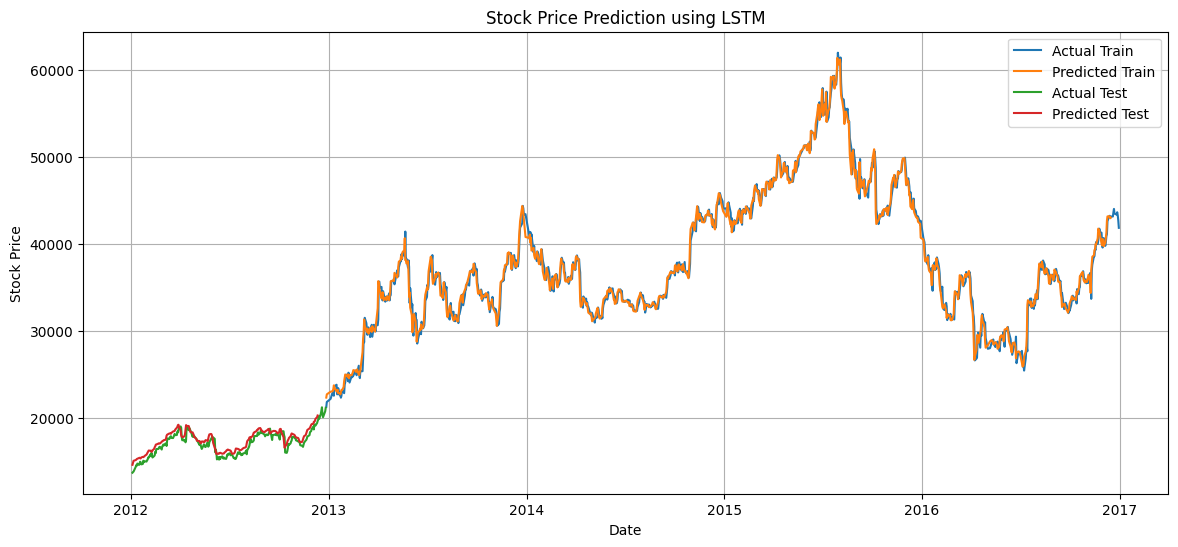

In [13]:
def plot_results(train_data, train_pred, test_data, test_pred):
    plt.figure(figsize=(14, 6))
    plt.plot(train_data.index, train_data['Close'], label='Actual Train')
    plt.plot(train_data.index[look_back:], train_pred[:, 0], label='Predicted Train')
    
    test_index = test_data.index
    plt.plot(test_index, test_data['Close'], label='Actual Test')
    plt.plot(test_index[look_back:], test_pred[:, 0], label='Predicted Test')
    
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title('Stock Price Prediction using LSTM')
    plt.grid()
    plt.show()

plot_results(train_data, train_pred, test_data, test_pred)


In [14]:
from sklearn.metrics import mean_squared_error

def print_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return rmse

train_rmse = print_rmse(train_data['Close'][look_back:], train_pred[:, 0])
test_rmse = print_rmse(test_data['Close'][look_back:], test_pred[:, 0])

print("Training RMSE: {:.4f}".format(train_rmse))
print("Testing RMSE: {:.4f}".format(test_rmse))


Training RMSE: 934.6483
Testing RMSE: 624.6363


In [25]:
def user_input_prediction_and_plot(model, scaler, look_back, test_data):
    user_input = int(input("Enter the number of days to predict stock prices: "))

    # Get the last 'look_back' days of data from the test set
    input_data = test_scaled[-look_back:]

    # Reshape the input data
    input_data = np.reshape(input_data, (1, look_back, 1))

    # Make predictions for the specified number of days
    predictions = []
    for _ in range(user_input):
        prediction = model.predict(input_data)
        predictions.append(prediction[0][0])
        input_data = np.append(input_data[:, 1:, :], prediction)
        input_data = np.reshape(input_data, (1, look_back, 1))

    # Inverse the scaling of the predicted values
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    print("Predicted stock prices for the next {} days:".format(user_input))
    for i, pred in enumerate(predictions, start=1):
        print("Day {}: {:.2f}".format(i, pred[0]))

    # Plot the actual test data with the last available data point
    plt.figure(figsize=(14, 6))
    plt.plot(test_data.index, test_data['Close'], label='Actual Test')

    # Plot the predicted stock prices starting from the last day of available data
    prediction_dates = pd.date_range(test_data.index[-1], periods=len(predictions) + 1, freq='D')[1:]
    plt.plot(prediction_dates, predictions, label='Predicted', linestyle='--', marker='o')

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title('Stock Price Prediction')
    plt.grid()
    plt.show()


Enter the number of days to predict stock prices: 1
1/1 [==============================] - 0s 17ms/step
Predicted stock prices for the next 1 days:
Day 1: 14466.86


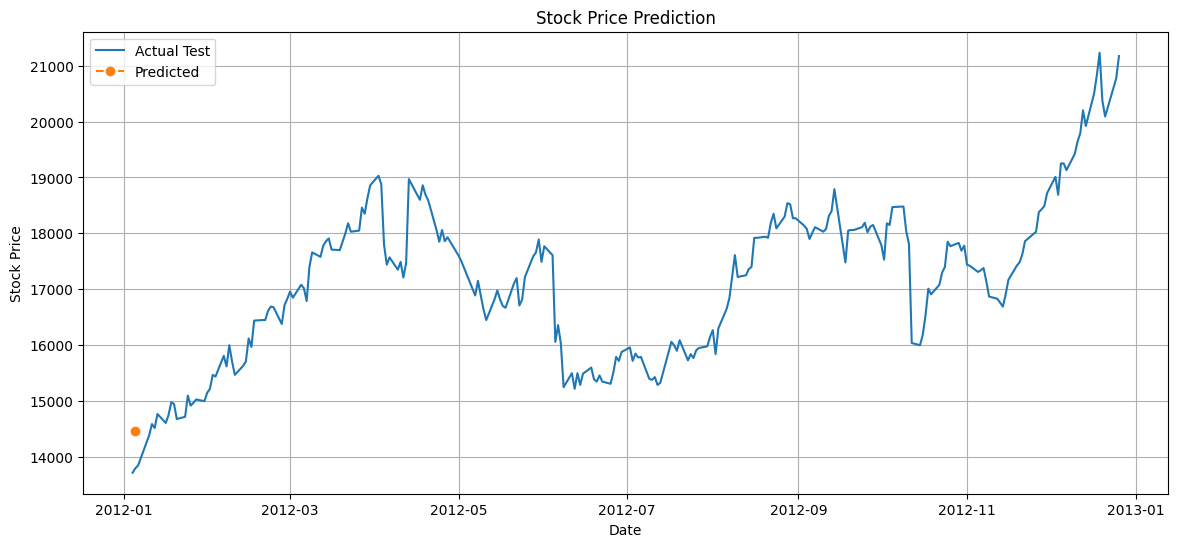

In [27]:
user_input_prediction_and_plot(model, scaler, look_back, test_data)


In [28]:
from datetime import datetime

def predict_specific_day(model, scaler, look_back, test_data, target_date):
    target_date = datetime.strptime(target_date, "%Y-%m-%d")
    last_date = test_data.index[-1].to_pydatetime()

    if target_date <= last_date:
        print("The target date should be after the last date of available data.")
        return

    days_to_predict = (target_date - last_date).days

    # Get the last 'look_back' days of data from the test set
    input_data = test_scaled[-look_back:]

    # Reshape the input data
    input_data = np.reshape(input_data, (1, look_back, 1))

    # Make predictions for the specified number of days
    for _ in range(days_to_predict):
        prediction = model.predict(input_data)
        input_data = np.append(input_data[:, 1:, :], prediction)
        input_data = np.reshape(input_data, (1, look_back, 1))

    # Inverse the scaling of the predicted value
    predicted_price = scaler.inverse_transform(prediction)

    print("Predicted stock price for {}: {:.2f}".format(target_date.strftime("%Y-%m-%d"), predicted_price[0][0]))


In [29]:
target_date = input("Enter the target date (YYYY-MM-DD): ")
predict_specific_day(model, scaler, look_back, test_data, target_date)


Enter the target date (YYYY-MM-DD): 2015-10-22
1/1 [==============================] - 0s 19ms/step
Predicted stock price for 2015-10-22: 32860.85
